# Multiple Linear Regression
## Rental Bikes Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.Essentially, the company wants —


- To understand the factors on which the demand for these shared bikes depends in the American market. 

- The company wants to know Which variables are significant in predicting the demand for shared bikes. 

- To create a linear model that quantitatively relates sharing bikes demand with variables such as casual, registered and cnt etc. etc.

- To know the accuracy of the model, i.e. How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [759]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [760]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd


In [761]:
# Read the given CSV file, and view some sample records
bikerental=pd.read_csv("day.csv")
bikerental.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

#### Inspect the various aspects of the bikes dataframe

In [762]:
#No of Rows and columns of the data frame
bikerental.shape

(730, 16)

In [763]:
#Columns of the data frame and their data types
bikerental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [764]:
#Summary of numeric columns
bikerental.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Step 2: Data Preparation

In [765]:
# 'instant' column has only ids which doesn't relate to the cnt. Hence, dropping the column instant from the data frame

bikerental.drop(['instant'], axis=1, inplace=True)

#Check for the first 5 rows of the data frame
bikerental.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018       1   0     1        0        1           1           2   
1  02-01-2018       1   0     1        0        2           1           2   
2  03-01-2018       1   0     1        0        3           1           1   
3  04-01-2018       1   0     1        0        4           1           1   
4  05-01-2018       1   0     1        0        5           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

Some of the columns like `season`,`yr`,`mnth`,`holiday`,`weekday`,`workingday` and `weathersit` in the data frame have ordered values of type numerical. So, we will change those columns into categorical for better visualization.

In [766]:
#Convert Season from numerical to categorical column for better visualization
def convert_Season(x):
    if x==1:
        return "spring"
    elif x==2:
        return "summer"
    elif x==3:
        return "fall"
    else:
        return "winter"
# Applying the function to the season
bikerental["season"] = bikerental["season"].apply(convert_Season) 
bikerental["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [767]:
#Convert yr from numerical to categorical column for better visualization
def convert_yr(x):
    if x==0:
        return "yr_2018"
    elif x==1:
        return "yr_2019"
# Applying the function to the year
bikerental["yr"] = bikerental["yr"].apply(convert_yr) 
bikerental["yr"].value_counts()

yr_2018    365
yr_2019    365
Name: yr, dtype: int64

In [768]:
#Convert mnth from numerical to categorical column for better visualization
import datetime
def convert_month(x):
    return datetime.date(1900, x, 1).strftime('%b')
# Applying the function to the mnth
bikerental["mnth"] = bikerental["mnth"].apply(convert_month) 
bikerental["mnth"].value_counts()

Jan    62
Aug    62
Mar    62
May    62
Oct    62
Dec    62
Jul    62
Nov    60
Sep    60
Apr    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [769]:
#Convert holiday from numerical to categorical column for better visualization
def convert_holiday(x):
    if x==0:
        return "Non Holiday"
    elif x==1:
        return "Holiday"
# Applying the function to the holiday
bikerental["holiday"] = bikerental["holiday"].apply(convert_holiday) 
bikerental["holiday"].value_counts()

Non Holiday    709
Holiday         21
Name: holiday, dtype: int64

In [770]:
#Convert weekday from numerical to categorical column for better visualization
def convert_weekday(x):
    week = ["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    return week[x]
# Applying the function to the weekday
bikerental["weekday"] = bikerental["weekday"].apply(convert_weekday) 
bikerental["weekday"].value_counts()

Monday       105
Tuesday      105
Sunday       104
Thursday     104
Friday       104
Saturday     104
Wednesday    104
Name: weekday, dtype: int64

In [771]:
#Convert workingday from numerical to categorical column for better visualization
def convert_workingday(x):
    if x==0:
        return "Non_workingday"
    elif x==1:
        return "Workingday"
# Applying the function to the workingday
bikerental["workingday"] = bikerental["workingday"].apply(convert_workingday) 
bikerental["workingday"].value_counts()

Workingday        504
Non_workingday    226
Name: workingday, dtype: int64

In [772]:
#Convert weather from numerical to categorical column for better visualization
def convert_weather(x):
    if x==1:
        return "weather1"
    elif x==2:
        return "weather2"
    elif x==3:
        return "weather3"
    else:
        return "weather4"
# Applying the function to the weathersit
bikerental["weathersit"] = bikerental["weathersit"].apply(convert_weather) 
bikerental["weathersit"].value_counts()

weather1    463
weather2    246
weather3     21
Name: weathersit, dtype: int64

## Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
We'll first make a pairplot of all the variables present to visualise which variables are most correlated to cnt (demand of shared bikes)

We'll visualise our data using `matplotlib` and `seaborn`.

In [773]:
import matplotlib.pyplot as plt
import seaborn as sns

Creating pair plots for the numeric variables `temp`, `atemp`,`hum`,`windspeed`,`casual`,`registered` and `cnt`

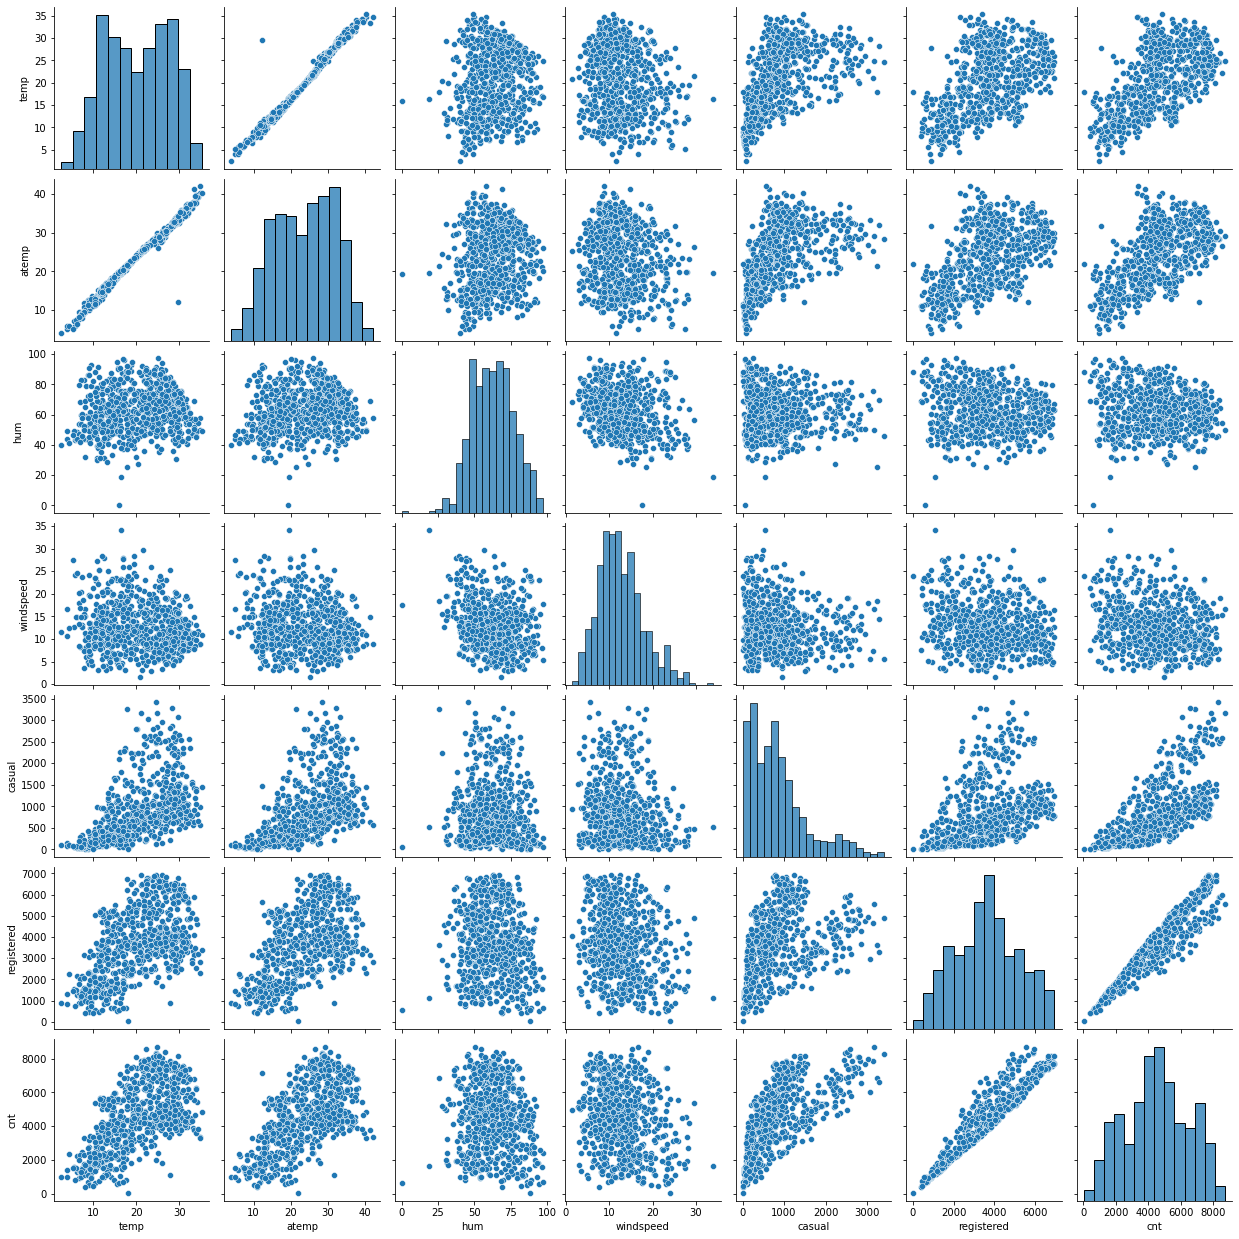

In [774]:
#creating an array with all the integer columns
bikerental_int=['temp', 'atemp','hum','windspeed','casual','registered','cnt']
#Pair plot for all the numeric columns
sns.pairplot(bikerental[bikerental_int],kind='scatter')
plt.show()

### Observations:
From the pair-plot among the numeric variables , it’s observed that `registered` highly correlated with the target variable `cnt`. Also, the independent variables `temp` and `atemp` are highly correlated with each other.

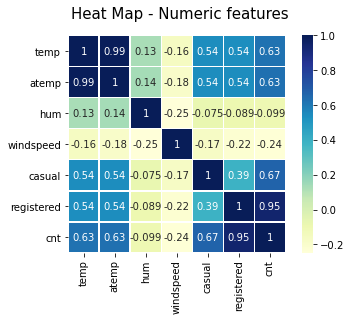

In [775]:
#Plotting Heatmap to find the correlations between the numeric variables
fig_size=(20,15)
sns.heatmap(bikerental[bikerental_int].corr(), annot = True, cmap="YlGnBu",linewidths=0.5,square=True)
plt.suptitle('Heat Map - Numeric features', fontsize=15) 
plt.show()

### Observations:
1. `temp` and `atemp` are almost having the same correlation with the other variables
2. `atemp` has the highest correlation of 0.99 with `temp`
3. `registered` has highest correlation of 0.95 with `cnt`
4. `hum` has leat correlation of -0.099 with `cnt`    

In [776]:
# As there's same correlation observed for the variables `temp` and `atemp` with others, we can have one variable 
# instead of both. Dropping `atemp` from the data frame to avoid multicollinearity. Also, `registered` has high correlation 
# with the target variable `cnt`. Hence, removing this to avoid biasing. 

bikerental.drop(['atemp','registered'], axis=1, inplace=True)

#Check for the first 5 rows of the data frame
bikerental.head()

dteday  season       yr mnth      holiday    weekday  workingday  \
0  01-01-2018  spring  yr_2018  Jan  Non Holiday     Monday  Workingday   
1  02-01-2018  spring  yr_2018  Jan  Non Holiday    Tuesday  Workingday   
2  03-01-2018  spring  yr_2018  Jan  Non Holiday  Wednesday  Workingday   
3  04-01-2018  spring  yr_2018  Jan  Non Holiday   Thursday  Workingday   
4  05-01-2018  spring  yr_2018  Jan  Non Holiday     Friday  Workingday   

  weathersit       temp      hum  windspeed  casual   cnt  
0   weather2  14.110847  80.5833  10.749882     331   985  
1   weather2  14.902598  69.6087  16.652113     131   801  
2   weather1   8.050924  43.7273  16.636703     120  1349  
3   weather1   8.200000  59.0435  10.739832     108  1562  
4   weather1   9.305237  43.6957  12.522300      82  1600

#### Visualising Categorical Variables
As noticed, there are a few categorical variables as well. Let's make a boxplot for some of the variables.

In [777]:
# Find all the categorical variables in the dataset

bikerental_catag = bikerental.select_dtypes(exclude=['float64','int64'])
bikerental_catag.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

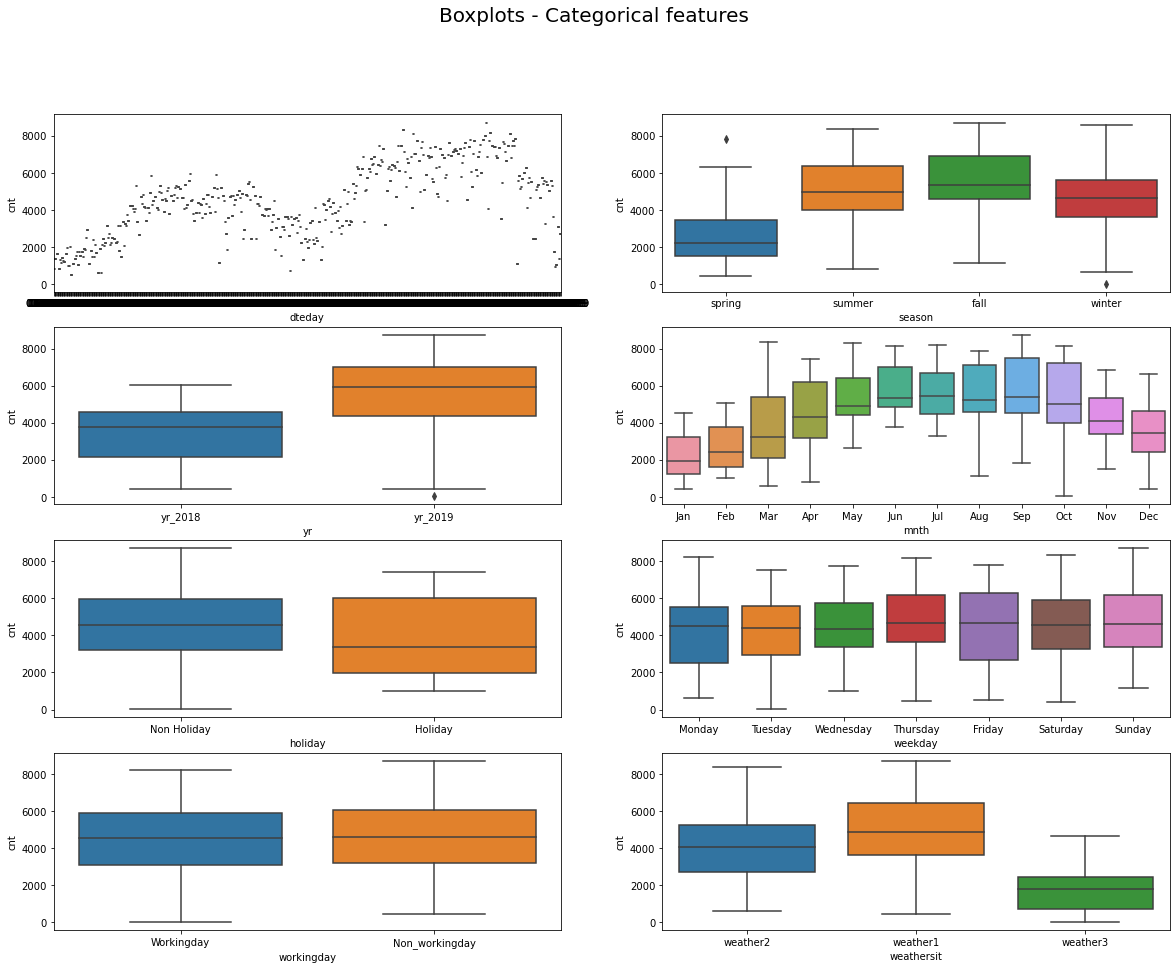

In [778]:
# Visualizing Categorical Variables -> BoxPlot
# In our case, y='cnt', x will be all the categorical variables
plt.figure(figsize=(20, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'dteday', y = 'cnt', data = bikerental)
plt.subplot(4,2,2)
sns.boxplot(x = 'season', y = 'cnt', data = bikerental)
plt.subplot(4,2,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bikerental)
plt.subplot(4,2,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikerental)
plt.subplot(4,2,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikerental)
plt.subplot(4,2,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikerental)
plt.subplot(4,2,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikerental)
plt.subplot(4,2,8)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikerental)
plt.suptitle('Boxplots - Categorical features', fontsize=20) 
plt.show()

### Observations:
1.	Bike demand doesn't show proper relation in case of dteday
2.	Bike Demand is high in fall and low in spring season.
3.	Bike Demand is high in the year 2019 when compared to 2018
4.	Bike demand is in the month of September.
5.	Bike demand is high during non-holidays when compared to holidays
6.	Bike demand almost similar for all the weekdays
7.	Bike demand almost similar whether it’s a working day or not.
8.	Bike demand is more when the weathersit is Clear, Few clouds, Partly cloudy and low when weathersit is Light Snow, Light Rain + Thunderstorm + Scattered clouds.


In [779]:
# Datedty doesn't show any linear relation with target. Hence, dropping the feature

bikerental.drop(['dteday'], axis=1, inplace=True)

#Check for the first 5 rows of the data frame
bikerental.head()

season       yr mnth      holiday    weekday  workingday weathersit  \
0  spring  yr_2018  Jan  Non Holiday     Monday  Workingday   weather2   
1  spring  yr_2018  Jan  Non Holiday    Tuesday  Workingday   weather2   
2  spring  yr_2018  Jan  Non Holiday  Wednesday  Workingday   weather1   
3  spring  yr_2018  Jan  Non Holiday   Thursday  Workingday   weather1   
4  spring  yr_2018  Jan  Non Holiday     Friday  Workingday   weather1   

        temp      hum  windspeed  casual   cnt  
0  14.110847  80.5833  10.749882     331   985  
1  14.902598  69.6087  16.652113     131   801  
2   8.050924  43.7273  16.636703     120  1349  
3   8.200000  59.0435  10.739832     108  1562  
4   9.305237  43.6957  12.522300      82  1600

## Step 4: Dummy Variables creation

### Dummy Variables
The variables `season`, `yr`, `holiday`, `weekday`, `workingday` and `weathersit` have string values which can not be understood by machine. So, we need need to convert these values into bools like 0 and 1. For this, we will use something called dummy variables.

In [780]:
# Get the dummy variables for the features season and store it in a new variable - 'seasonsdummy' and drop the first column 
# from seasons df using 'drop_first = True'  as the remaining will explain the first column.
seasonsdummy = pd.get_dummies(bikerental['season'], drop_first = True)

# Add the results to the original bikerental dataframe
bikerental = pd.concat([bikerental, seasonsdummy], axis = 1)

# Drop 'season' as we have created the dummies for it
bikerental.drop(['season'], axis = 1, inplace = True)

# Now let's see the head of our dataframe.
bikerental.head()

yr mnth      holiday    weekday  workingday weathersit       temp  \
0  yr_2018  Jan  Non Holiday     Monday  Workingday   weather2  14.110847   
1  yr_2018  Jan  Non Holiday    Tuesday  Workingday   weather2  14.902598   
2  yr_2018  Jan  Non Holiday  Wednesday  Workingday   weather1   8.050924   
3  yr_2018  Jan  Non Holiday   Thursday  Workingday   weather1   8.200000   
4  yr_2018  Jan  Non Holiday     Friday  Workingday   weather1   9.305237   

       hum  windspeed  casual   cnt  spring  summer  winter  
0  80.5833  10.749882     331   985       1       0       0  
1  69.6087  16.652113     131   801       1       0       0  
2  43.7273  16.636703     120  1349       1       0       0  
3  59.0435  10.739832     108  1562       1       0       0  
4  43.6957  12.522300      82  1600       1       0       0

In [781]:
# Get the dummy variables for the features yr and store it in a new variable - 'yrdummy' and drop the first column 
# from yrdummy df using 'drop_first = True' as the remaining will explain the first column.
yrdummy = pd.get_dummies(bikerental['yr'], drop_first = True)

# Add the results to the original bikerental dataframe
bikerental = pd.concat([bikerental, yrdummy], axis = 1)

# Drop 'yr' as we have created the dummies for it
bikerental.drop(['yr'], axis = 1, inplace = True)

# Now let's see the head of our dataframe.
bikerental.head()

mnth      holiday    weekday  workingday weathersit       temp      hum  \
0  Jan  Non Holiday     Monday  Workingday   weather2  14.110847  80.5833   
1  Jan  Non Holiday    Tuesday  Workingday   weather2  14.902598  69.6087   
2  Jan  Non Holiday  Wednesday  Workingday   weather1   8.050924  43.7273   
3  Jan  Non Holiday   Thursday  Workingday   weather1   8.200000  59.0435   
4  Jan  Non Holiday     Friday  Workingday   weather1   9.305237  43.6957   

   windspeed  casual   cnt  spring  summer  winter  yr_2019  
0  10.749882     331   985       1       0       0        0  
1  16.652113     131   801       1       0       0        0  
2  16.636703     120  1349       1       0       0        0  
3  10.739832     108  1562       1       0       0        0  
4  12.522300      82  1600       1       0       0        0

In [782]:
# Get the dummy variables for the features month and store it in a new variable - 'monthsdummy' and drop the first column 
# from monthsdummy df using 'drop_first = True' as the remaining will explain the first column.
monthsdummy = pd.get_dummies(bikerental['mnth'], drop_first = True)

# Add the results to the original bikerental dataframe
bikerental = pd.concat([bikerental, monthsdummy], axis = 1)

# Drop 'mnth' as we have created the dummies for it
bikerental.drop(['mnth'], axis = 1, inplace = True)

# Now let's see the head of our dataframe.
bikerental.head()

holiday    weekday  workingday weathersit       temp      hum  \
0  Non Holiday     Monday  Workingday   weather2  14.110847  80.5833   
1  Non Holiday    Tuesday  Workingday   weather2  14.902598  69.6087   
2  Non Holiday  Wednesday  Workingday   weather1   8.050924  43.7273   
3  Non Holiday   Thursday  Workingday   weather1   8.200000  59.0435   
4  Non Holiday     Friday  Workingday   weather1   9.305237  43.6957   

   windspeed  casual   cnt  spring  ...  Dec  Feb  Jan  Jul  Jun  Mar  May  \
0  10.749882     331   985       1  ...    0    0    1    0    0    0    0   
1  16.652113     131   801       1  ...    0    0    1    0    0    0    0   
2  16.636703     120  1349       1  ...    0    0    1    0    0    0    0   
3  10.739832     108  1562       1  ...    0    0    1    0    0    0    0   
4  12.522300      82  1600       1  ...    0    0    1    0    0    0    0   

   Nov  Oct  Sep  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  

[5 rows x 24 columns]

In [783]:
# Get the dummy variables for the features holiday and store it in a new variable - 'holiday' and drop the first column 
# from seasons df using 'drop_first = True'
holidaydummy = pd.get_dummies(bikerental['holiday'], drop_first = True)

# Add the results to the original bikerental dataframe
bikerental = pd.concat([bikerental, holidaydummy], axis = 1)

# Drop 'holiday' as we have created the dummies for it
bikerental.drop(['holiday'], axis = 1, inplace = True)

# Now let's see the head of our dataframe.
bikerental.head()

weekday  workingday weathersit       temp      hum  windspeed  casual  \
0     Monday  Workingday   weather2  14.110847  80.5833  10.749882     331   
1    Tuesday  Workingday   weather2  14.902598  69.6087  16.652113     131   
2  Wednesday  Workingday   weather1   8.050924  43.7273  16.636703     120   
3   Thursday  Workingday   weather1   8.200000  59.0435  10.739832     108   
4     Friday  Workingday   weather1   9.305237  43.6957  12.522300      82   

    cnt  spring  summer  ...  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  \
0   985       1       0  ...    0    1    0    0    0    0    0    0    0   
1   801       1       0  ...    0    1    0    0    0    0    0    0    0   
2  1349       1       0  ...    0    1    0    0    0    0    0    0    0   
3  1562       1       0  ...    0    1    0    0    0    0    0    0    0   
4  1600       1       0  ...    0    1    0    0    0    0    0    0    0   

   Non Holiday  
0            1  
1            1  
2            1  
3            1  
4            1  

[5 rows x 24 columns]

In [784]:
# Get the dummy variables for the features weekday and store it in a new variable - 'weekdaydummy' and drop the first column 
# from seasons df using 'drop_first = True'
weekdaydummy = pd.get_dummies(bikerental['weekday'], drop_first = True)

# Add the results to the original bikerental dataframe
bikerental = pd.concat([bikerental, weekdaydummy], axis = 1)

# Drop 'weekday' as we have created the dummies for it
bikerental.drop(['weekday'], axis = 1, inplace = True)

# Now let's see the head of our dataframe.
bikerental.head()

workingday weathersit       temp      hum  windspeed  casual   cnt  spring  \
0  Workingday   weather2  14.110847  80.5833  10.749882     331   985       1   
1  Workingday   weather2  14.902598  69.6087  16.652113     131   801       1   
2  Workingday   weather1   8.050924  43.7273  16.636703     120  1349       1   
3  Workingday   weather1   8.200000  59.0435  10.739832     108  1562       1   
4  Workingday   weather1   9.305237  43.6957  12.522300      82  1600       1   

   summer  winter  ...  Nov  Oct  Sep  Non Holiday  Monday  Saturday  Sunday  \
0       0       0  ...    0    0    0            1       1         0       0   
1       0       0  ...    0    0    0            1       0         0       0   
2       0       0  ...    0    0    0            1       0         0       0   
3       0       0  ...    0    0    0            1       0         0       0   
4       0       0  ...    0    0    0            1       0         0       0   

   Thursday  Tuesday  Wednesday  
0         0        0          0  
1         0        1          0  
2         0        0          1  
3         1        0          0  
4         0        0          0  

[5 rows x 29 columns]

In [785]:
# Get the dummy variables for the features workingday and store it in a new variable - 'workingdaydummy' and drop the first column 
# from seasons df using 'drop_first = True'
workingdaydummy = pd.get_dummies(bikerental['workingday'], drop_first = True)

# Add the results to the original bikerental dataframe
bikerental = pd.concat([bikerental, workingdaydummy], axis = 1)

# Drop 'workingday' as we have created the dummies for it
bikerental.drop(['workingday'], axis = 1, inplace = True)

# Now let's see the head of our dataframe.
bikerental.head()

weathersit       temp      hum  windspeed  casual   cnt  spring  summer  \
0   weather2  14.110847  80.5833  10.749882     331   985       1       0   
1   weather2  14.902598  69.6087  16.652113     131   801       1       0   
2   weather1   8.050924  43.7273  16.636703     120  1349       1       0   
3   weather1   8.200000  59.0435  10.739832     108  1562       1       0   
4   weather1   9.305237  43.6957  12.522300      82  1600       1       0   

   winter  yr_2019  ...  Oct  Sep  Non Holiday  Monday  Saturday  Sunday  \
0       0        0  ...    0    0            1       1         0       0   
1       0        0  ...    0    0            1       0         0       0   
2       0        0  ...    0    0            1       0         0       0   
3       0        0  ...    0    0            1       0         0       0   
4       0        0  ...    0    0            1       0         0       0   

   Thursday  Tuesday  Wednesday  Workingday  
0         0        0          0           1  
1         0        1          0           1  
2         0        0          1           1  
3         1        0          0           1  
4         0        0          0           1  

[5 rows x 29 columns]

In [786]:
# Get the dummy variables for the features weathersit and store it in a new variable - 'weatherdummy' and drop the first column 
# from weather df using 'drop_first = True'
weatherdummy = pd.get_dummies(bikerental['weathersit'], drop_first = True)

# Add the results to the original bikerental dataframe
bikerental = pd.concat([bikerental, weatherdummy], axis = 1)

# Drop 'weathersit' as we have created the dummies for it
bikerental.drop(['weathersit'], axis = 1, inplace = True)

# Check what the dataset 'weather' looks like
bikerental.head()

temp      hum  windspeed  casual   cnt  spring  summer  winter  \
0  14.110847  80.5833  10.749882     331   985       1       0       0   
1  14.902598  69.6087  16.652113     131   801       1       0       0   
2   8.050924  43.7273  16.636703     120  1349       1       0       0   
3   8.200000  59.0435  10.739832     108  1562       1       0       0   
4   9.305237  43.6957  12.522300      82  1600       1       0       0   

   yr_2019  Aug  ...  Non Holiday  Monday  Saturday  Sunday  Thursday  \
0        0    0  ...            1       1         0       0         0   
1        0    0  ...            1       0         0       0         0   
2        0    0  ...            1       0         0       0         0   
3        0    0  ...            1       0         0       0         1   
4        0    0  ...            1       0         0       0         0   

   Tuesday  Wednesday  Workingday  weather2  weather3  
0        0          0           1         1         0  
1        1          0           1         1         0  
2        0          1           1         0         0  
3        0          0           1         0         0  
4        0          0           1         0         0  

[5 rows x 30 columns]

## Step 5: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [787]:
#Importing `sklearn` package to perform linear regression and performing the train-test split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikerental, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As we saw in the demonstration for Simple/Multiple Linear Regression, scaling doesn't impact our model. Here we can see that `temp`,`hum`,`windspeed`, `casual` and `cnt` have larger integer values when compared to others. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As we know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [788]:
#Imporitng MinMaxScaler from sklearn.preprocessing package
from sklearn.preprocessing import MinMaxScaler

#Initialiting scaler object
scaler = MinMaxScaler()

In [789]:
# Apply scaler() to all the columns except the'dummy' variables of the training data set
num_vars = ['temp', 'hum', 'windspeed','casual','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [790]:
#Check the data frame after re scaling
df_train.head()

temp       hum  windspeed    casual       cnt  spring  summer  \
653  0.509887  0.575354   0.300794  0.280402  0.864243       0       0   
576  0.815169  0.725633   0.264686  0.294422  0.827658       0       0   
426  0.442393  0.640189   0.255342  0.290765  0.465255       1       0   
728  0.245101  0.498067   0.663106  0.110332  0.204096       1       0   
482  0.395666  0.504508   0.188475  0.340750  0.482973       0       1   

     winter  yr_2019  Aug  ...  Non Holiday  Monday  Saturday  Sunday  \
653       1        1    0  ...            1       0         0       0   
576       0        1    0  ...            1       0         0       0   
426       0        1    0  ...            1       0         0       1   
728       0        1    0  ...            1       1         0       0   
482       0        1    0  ...            1       0         0       1   

     Thursday  Tuesday  Wednesday  Workingday  weather2  weather3  
653         0        0          1           1         0         0  
576         0        0          1           1         0         0  
426         0        0          0           0         1         0  
728         0        0          0           1         0         0  
482         0        0          0           0         1         0  

[5 rows x 30 columns]

In [791]:
#Check the numeric data traiing summary for the training data set after re scaling
df_train.describe()

temp         hum   windspeed      casual         cnt      spring  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.537262    0.650369    0.320768    0.254661    0.513620    0.243137   
std      0.225844    0.145882    0.169797    0.206011    0.224593    0.429398   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.339853    0.538643    0.199179    0.094179    0.356420    0.000000   
50%      0.540519    0.653714    0.296763    0.212740    0.518638    0.000000   
75%      0.735215    0.754830    0.414447    0.327415    0.684710    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           summer     winter     yr_2019         Aug  ...  Non Holiday  \
count  510.000000  510.00000  510.000000  510.000000  ...   510.000000   
mean     0.245098    0.24902    0.507843    0.096078  ...     0.974510   
std      0.430568    0.43287    0.500429    0.294988  ...     0.157763   
min      0.000000    0.00000    0.000000    0.000000  ...     0.000000   
25%      0.000000    0.00000    0.000000    0.000000  ...     1.000000   
50%      0.000000    0.00000    1.000000    0.000000  ...     1.000000   
75%      0.000000    0.00000    1.000000    0.000000  ...     1.000000   
max      1.000000    1.00000    1.000000    1.000000  ...     1.000000   

           Monday    Saturday      Sunday    Thursday     Tuesday   Wednesday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.154902    0.129412    0.137255    0.143137    0.152941    0.135294   
std      0.362166    0.335985    0.344454    0.350557    0.360284    0.342373   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       Workingday    weather2    weather3  
count  510.000000  510.000000  510.000000  
mean     0.711765    0.343137    0.029412  
std      0.453386    0.475223    0.169124  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      1.000000    0.000000    0.000000  
75%      1.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

### Dividing into X and Y sets for the model building

In [792]:
#removing target variable from y_train and keeping the other column in the X_train data set
y_train = df_train.pop('cnt')
X_train = df_train

## Step 6: Building a linear model

As we've many columns,building model manually is time taking.Hence, we will use automatic model building using Recursive feature elimination (RFE is a utility from sklearn)

In [793]:
# Importing RFE, LinearRegression and statsmodel api for modelling
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  

In [794]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            # running RFE
rfe = rfe.fit(X_train, y_train)  # Running the linear model with rfe

#List of all the columns from the output variable after runing rfe, their support from rfe and ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) 

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('yr_2019', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 9),
 ('Feb', False, 10),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 6),
 ('Mar', False, 15),
 ('May', False, 3),
 ('Nov', False, 4),
 ('Oct', False, 8),
 ('Sep', True, 1),
 ('Non Holiday', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 11),
 ('Sunday', True, 1),
 ('Thursday', False, 5),
 ('Tuesday', True, 1),
 ('Wednesday', False, 14),
 ('Workingday', False, 12),
 ('weather2', True, 1),
 ('weather3', True, 1)]

In [795]:
# Check the columns considered for modelling after applying RFE
col = X_train.columns[rfe.support_]
print(col,"\n\n","Length of the col array is:", len(col))

Index(['temp', 'hum', 'windspeed', 'casual', 'spring', 'winter', 'yr_2019',
       'Jul', 'Sep', 'Non Holiday', 'Monday', 'Sunday', 'Tuesday', 'weather2',
       'weather3'],
      dtype='object') 

 Length of the col array is: 15


### Building model using statsmodel, for the detailed statistics
#### Model1

In [796]:
# Function to build model based on the data frame
def build_model(X,y):
    X = sm.add_constant(X) # Adding a constant variable
    lm = sm.OLS(y_train,X).fit()   # Running the linear model
    print(lm.summary()) # #Let's see the summary of our linear model
    return X

In [797]:
#Building the model
X_train_rfe=build_model(X_train[col], y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     266.0
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.46e-225
Time:                        14:11:10   Log-Likelihood:                 600.96
No. Observations:                 510   AIC:                            -1170.
Df Residuals:                     494   BIC:                            -1102.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1828      0.034      5.426      

Looking at the above summary, all the P-values look good. We'll supplement this with VIF information to decide if the model is good

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [798]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [799]:
#Function for calculating the VIF value
def checkVIF(X):
    vif = pd.DataFrame()
    X = X.drop(['const'], axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [800]:
checkVIF(X_train_rfe)

Features    VIF
1           hum  29.37
9   Non Holiday  24.36
0          temp  21.55
3        casual   6.52
2     windspeed   4.66
4        spring   2.84
13     weather2   2.34
6       yr_2019   2.29
5        winter   2.15
10       Monday   1.85
11       Sunday   1.52
7           Jul   1.45
12      Tuesday   1.40
14     weather3   1.27
8           Sep   1.21

### Observations:
With 15 features in the training data set, the model's R-squared value is 0.890 and adjusted R-Squared is 0.886. 
The R2 and adjusted R2 are good and P-Values are also acceptable. But some of the features have VIF > 5. So, let's try dropping a feature, build the model manually and check these parameters.

### Dropping the variable and updating the model manually

As we can see from the summary and the VIF dataframe, some variables are still insignificant because of high VIF values. 
One of these variables is, `hum` as it has a very high VIF value of `29.37` Let's go ahead and drop this variable.

In [801]:
#Dropping hum feature from the training features
X_train_new = X_train_rfe.drop(['hum'], axis=1)

#### Model2

In [802]:
#Building the model again
X_train_new=build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     277.8
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          6.08e-224
Time:                        14:11:11   Log-Likelihood:                 594.70
No. Observations:                 510   AIC:                            -1159.
Df Residuals:                     495   BIC:                            -1096.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1221      0.029      4.179      

Looking at the above summary, all the P-values look good. We'll supplement this with VIF information to decide if the model is good

In [803]:
#Calculate the VIF values of the training data set features
checkVIF(X_train_new)

Features    VIF
8   Non Holiday  18.87
0          temp  16.43
2        casual   6.52
1     windspeed   4.60
3        spring   2.51
5       yr_2019   2.29
9        Monday   1.85
4        winter   1.80
12     weather2   1.65
10       Sunday   1.52
6           Jul   1.41
11      Tuesday   1.39
7           Sep   1.20
13     weather3   1.13

### Observations:
With 14 features in the training data set, the model's R-squared value is 0.887 and adjusted R-Squared is 0.884. 
The R2 and adjusted R2 are good and P-values are also acceptable. But still some of the features have VIF > 5. So, let's try dropping a feature, build the model and check these parameters.

### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are still insignificant because of high VIF values. 
One of these variables is, `Non Holiday` as it has a very high VIF value of `18.87` Let's go ahead and drop this variable.

In [804]:
#Dropping Non Holiday feature from the training features
X_train_new = X_train_new.drop(['Non Holiday'], axis=1)

#### Model3

In [805]:
#Building the model again
X_train_new=build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     277.8
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          5.84e-218
Time:                        14:11:11   Log-Likelihood:                 577.53
No. Observations:                 510   AIC:                            -1127.
Df Residuals:                     496   BIC:                            -1068.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2474      0.021     11.999      0.0

Looking at the above summary, all the P-values look good. We'll supplement this with VIF information to decide if the model is good

In [806]:
#Calculate the VIF values of the training data set features
checkVIF(X_train_new)

Features   VIF
0        temp  8.39
2      casual  6.51
1   windspeed  4.19
5     yr_2019  2.27
8      Monday  1.81
3      spring  1.74
11   weather2  1.60
9      Sunday  1.51
4      winter  1.42
6         Jul  1.39
10    Tuesday  1.39
7         Sep  1.20
12   weather3  1.13

### Observations:
With 13 features in the training data set, the model's R-squared value is 0.879 and adjusted R-Squared is 0.876. 
The R2 and adjusted R2 are good and P-values are also acceptable. But still some of the features have VIF > 5. So, let's try dropping a feature, build the model and check these parameters.

### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are still insignificant because of high VIF values. 
One of these variables is, `temp` as it has a very high VIF value of `8.39` Let's go ahead and drop this variable.

In [807]:
#Dropping temp feature from the training features
X_train_new = X_train_new.drop(['temp'], axis=1)

#### Model4

In [808]:
#Building the model again
X_train_new=build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     238.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.98e-197
Time:                        14:11:11   Log-Likelihood:                 525.49
No. Observations:                 510   AIC:                            -1025.
Df Residuals:                     497   BIC:                            -969.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4196      0.014     29.849      0.0

Looking at the above summary, some of the P-values are > 0.05. We'll supplement this with VIF information to decide if the model is good

In [809]:
#Calcualte the VIF information
checkVIF(X_train_new)

Features   VIF
1      casual  3.69
0   windspeed  3.08
4     yr_2019  2.26
2      spring  1.74
7      Monday  1.68
8      Sunday  1.46
10   weather2  1.46
3      winter  1.42
9     Tuesday  1.37
5         Jul  1.16
6         Sep  1.15
11   weather3  1.11

### Observations:
With 12 features in the training data set, the model's R-squared value is 0.852 and adjusted R-Squared is 0.848. 
The R2 and adjusted R2 are good. Also, VIF values look good. But some of the features have P-Values> 0.05. So, let's try dropping a feature, build the model and check these parameters.

### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are still insignificant because of high P-values. 
One of these variables is, `winter` as it has a P-value of `0.671` Let's go ahead and drop this variable.

In [810]:
#Dropping winter feature from the model
X_train_new = X_train_new.drop(['winter'], axis=1)

#### Model5

In [811]:
#Bulding the model again
X_train_new=build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     260.3
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.97e-198
Time:                        14:11:12   Log-Likelihood:                 525.40
No. Observations:                 510   AIC:                            -1027.
Df Residuals:                     498   BIC:                            -976.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4223      0.012     33.824      0.0

In [812]:
#Calculating the VIF information
checkVIF(X_train_new)

Features   VIF
1      casual  3.68
0   windspeed  2.92
3     yr_2019  2.22
6      Monday  1.65
2      spring  1.59
7      Sunday  1.45
9    weather2  1.44
8     Tuesday  1.35
5         Sep  1.15
4         Jul  1.14
10   weather3  1.09

### Observations:
With 11 features in the training data set, the model's R-squared value is 0.852 and adjusted R-Squared is 0.849. 
The R2 and adjusted R2 are good. Also, VIF values look good. But some of the features have P-Values> 0.05. So, let's try dropping a feature, build the model and check these parameters.

### Dropping the variable and updating the model

As we can see from the summary and the VIF information, `Jul` still insignificant because of high P-value of `0.191` Let's go ahead and drop this variable.

In [813]:
#Dropping Jul from the features
X_train_new = X_train_new.drop(['Jul'], axis=1)

#### Model6

In [814]:
#Build the model again
X_train_new=build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     285.7
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.67e-199
Time:                        14:11:12   Log-Likelihood:                 524.52
No. Observations:                 510   AIC:                            -1027.
Df Residuals:                     499   BIC:                            -980.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4247      0.012     34.354      0.0

In [815]:
#Calculate the VIF information
checkVIF(X_train_new)

Features   VIF
1     casual  3.57
0  windspeed  2.91
3    yr_2019  2.22
5     Monday  1.65
2     spring  1.58
6     Sunday  1.45
8   weather2  1.44
7    Tuesday  1.34
4        Sep  1.13
9   weather3  1.09

### Observations:
With 10 features in the training data set, the model's R-squared value is 0.851 and adjusted R-Squared is 0.848. 
The R2 and adjusted R2 are good. Also, P-values and VIF values look good. So, we can consider this as final model for further analysis.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [816]:
# Running the final linear model
lm = sm.OLS(y_train,X_train_new).fit()

In [817]:
# Now let's use our model to make predictions using final training data set
y_train_pred = lm.predict(X_train_new)
res = (y_train - y_train_pred)

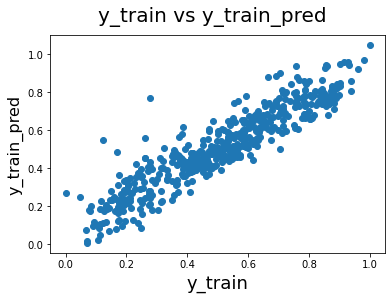

In [818]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label
plt.show()

There's a linear relationship between the actual training dependent data and predicted training dependent data 

#### Component-Component plus Residual (CCPR) Plots
The CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables.

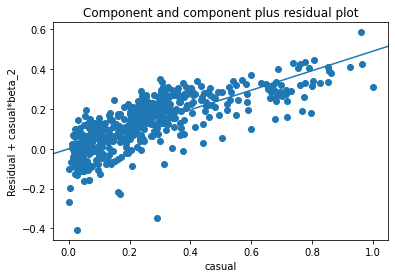

In [819]:
#Component plus residual plot to check the linear relationship of the independent and dependent varaibles
sm.graphics.plot_ccpr(lm, 'casual')
plt.show()

From the above, still the linear relationship is maintained in the model

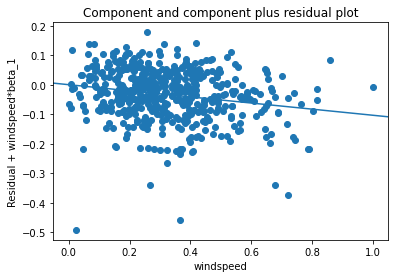

In [820]:
#PLot Component plus residual plot to check the linear relationship of the independent and dependent varaibles
sm.graphics.plot_ccpr(lm, 'windspeed')
plt.show()

From the above, still the linear relationship is maintained in the model

In [821]:
#Calculate the VIF information for multicollinearity check for the final model
checkVIF(X_train_new)

Features   VIF
1     casual  3.57
0  windspeed  2.91
3    yr_2019  2.22
5     Monday  1.65
2     spring  1.58
6     Sunday  1.45
8   weather2  1.44
7    Tuesday  1.34
4        Sep  1.13
9   weather3  1.09

As per the above VIF information, we can say that multicollinearity doesn't exist between the features in the final model.

#### Looking for patterns in the residuals

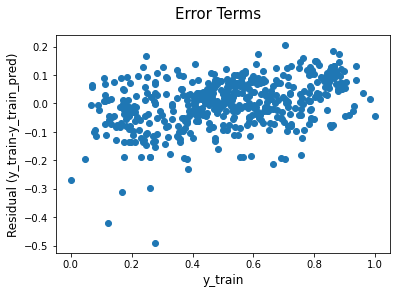

In [822]:
# scatter plot for the checking the homoscedasticity
plt.scatter(y_train,res)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel("y_train",fontsize=12)
plt.ylabel("Residual (y_train-y_train_pred)", fontsize=12)
plt.show()

From the above plot, we can say that Error Terms have constant varianace (homoscedastic) and there's no visible pattern

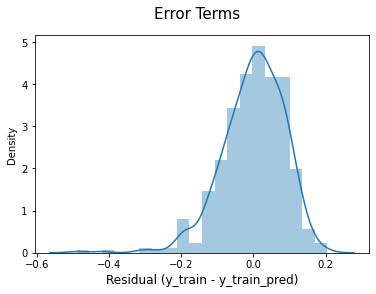

In [823]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Residual (y_train - y_train_pred)', fontsize = 12)                         # X-label
plt.show()

From the above plot, we can say that Error Terms are normally distributed.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. Model6.

#### Applying the scaling on the test sets

In [824]:
#Transforming the test data frame using min max scaling
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [825]:
#Checking the summary of numeric variables of test data frame
df_test.describe()

temp         hum   windspeed      casual         cnt      spring  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.558941    0.638508    0.313350    0.266372    0.520592    0.255708   
std      0.233698    0.148974    0.159947    0.217246    0.218435    0.437258   
min      0.046591    0.261915   -0.042808    0.002133    0.048205    0.000000   
25%      0.354650    0.527265    0.198517    0.101951    0.377531    0.000000   
50%      0.558691    0.627737    0.299459    0.223712    0.524275    0.000000   
75%      0.759096    0.743928    0.403048    0.362085    0.672745    1.000000   
max      0.984424    1.002146    0.807474    1.038708    0.963300    1.000000   

           summer      winter     yr_2019         Aug  ...  Non Holiday  \
count  219.000000  219.000000  219.000000  219.000000  ...   219.000000   
mean     0.264840    0.232877    0.479452    0.059361  ...     0.963470   
std      0.442259    0.423633    0.500722    0.236840  ...     0.188034   
min      0.000000    0.000000    0.000000    0.000000  ...     0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...     1.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...     1.000000   
75%      1.000000    0.000000    1.000000    0.000000  ...     1.000000   
max      1.000000    1.000000    1.000000    1.000000  ...     1.000000   

           Monday    Saturday      Sunday    Thursday     Tuesday   Wednesday  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.118721    0.173516    0.155251    0.141553    0.123288    0.155251   
std      0.324202    0.379560    0.362974    0.349389    0.329520    0.362974   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       Workingday    weather2    weather3  
count  219.000000  219.000000  219.000000  
mean     0.639269    0.319635    0.027397  
std      0.481313    0.467403    0.163612  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      1.000000    0.000000    0.000000  
75%      1.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

#### Dividing into X_test and y_test

In [826]:
#Divide the test data frome into y_test and X_test
y_test = df_test.pop('cnt')
X_test = df_test

In [827]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns[1:]]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [828]:
#Checking the columns in the X_test_new data frame 
X_test_new.columns

Index(['const', 'windspeed', 'casual', 'spring', 'yr_2019', 'Sep', 'Monday',
       'Sunday', 'Tuesday', 'weather2', 'weather3'],
      dtype='object')

In [829]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values of target variable.

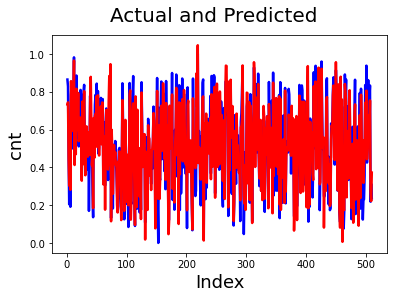

In [830]:
# Actual vs Predicted for training data
c = [i for i in range(1,y_train.shape[0]+1)] # generating index
fig = plt.figure()
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) 
plt.xlabel('Index', fontsize=18) 
plt.ylabel('cnt', fontsize=18) 
plt.show()

From the above, actual and predicted values are almost following the same lines which is good.

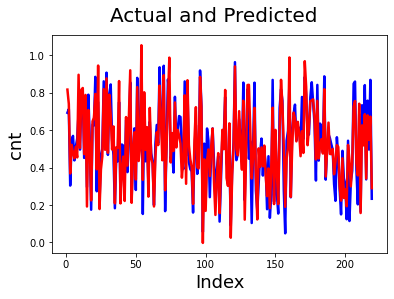

In [831]:
# Actual vs Predicted for test data
c = [i for i in range(1,y_test.shape[0]+1)] # generating index
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) 
plt.xlabel('Index', fontsize=18) 
plt.ylabel('cnt', fontsize=18) 
plt.show()

From the above, actual and predicted values are almost following the same lines which is good.

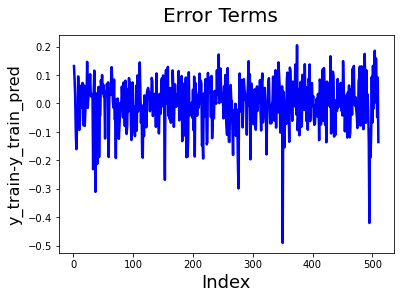

In [832]:
# Error terms for training data
c = [i for i in range(1,y_train.shape[0]+1)]
fig = plt.figure()
plt.plot(c,y_train-y_train_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('y_train-y_train_pred', fontsize=16) 
plt.show()

From the above, Error Terms are not showing any pattern.

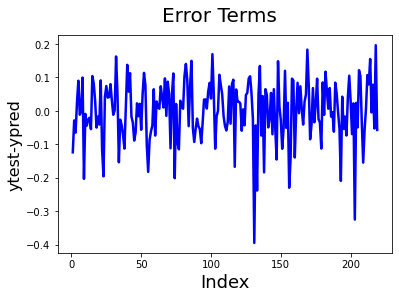

In [833]:
# Error terms for test data
c = [i for i in range(1,y_test.shape[0]+1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('ytest-ypred', fontsize=16) 
plt.show()

From the above, Error Terms are not showing any pattern.

We can see that the equation of our best fitted line is:

$ cnt=0.4247-0.1037 \times windspeed+0.4906 \times casual-0.1672 \times spring+0.2017 \times yr2019+0.0659 \times Sep-0.1419 \times Monday-0.0729  \times Sunday-0.0781 \times Tuesday-0.0574 \times weather2-0.2093 \times weather3 $

R-squared and Adj. R-squared Calculation for the test data

In [834]:
#import necesary libraries for R2 and MSE calcualtion.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [835]:
#Calcualte R2 for the test data
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8313

In [836]:
# n is number of rows in test dataset
n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.8223

R-squared and Adj.R-Squared are good with training and test data sets. So, it appears that we've developed a decent model.
#### Training data: 
R-squared: 0.851  Adj. R-squared: 0.848
#### Test data:    
R-squared: 0.8313 Adj. R-squared: 0.8223

#### RMSE calculation for the test data

In [837]:
#Returns the mean squared error (MSE)
mean_squared_error(y_test, y_pred)

0.008013020141262104

In [839]:
#Returns the Root mean squared error (RMSE)
np.sqrt(mean_squared_error(y_test, y_pred))

0.0895154743117753

The MSE(Measn Squared Error) is very low (0.008) which means the model is not able to match 0.8% of the values only, which is good. RMSE (Root Means squared error) is 0.0895 which is less than 0.1. So, our model is decent. We can try non linear model as well.

### Conclusion:
The features to predict the demand of the sharing rental bikes as per the final model are:
casual,
weather3,
yr_2019,
spring,
Monday,
windspeed,
Tuesday,
Sunday,
Sep,
weather2
